In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Load and preprocess the data
# Load data from CSV file
data = pd.read_csv(r"D:\Machine_Learning_Rexgalaxy\Machine Learning_class\Class2_Linear_Regression\SimpleLinearRegression\Salary_Data.csv")

# Check the first few rows of the data
print(data.head())

# Separate features and target
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Step 2: Define the neural network model
model = Sequential([
    Input(shape=(1,)),  # Input layer with one feature
    Dense(10, activation='relu'),  # Hidden layer
    Dense(10, activation='relu'),  # Another hidden layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Step 3: Train the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=10, validation_split=0.2)

# Step 4: Make predictions
# Predict on the test data
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate and print the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Print the predictions
for i in range(len(X_test)):
    print(f"Years of Experience: {X_test[i][0]}, Actual Salary: {y_test[i][0]}, Predicted Salary: {y_pred[i][0]}")


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - loss: 1.5349 - val_loss: 0.3307
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.6897 - val_loss: 0.3246
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.5400 - val_loss: 0.3185
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.3669 - val_loss: 0.3124
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4909 - val_loss: 0.3065
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.2474 - val_loss: 0.3001
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4274 - val_loss: 0.2941
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2214 - val_loss: 0.2880
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2588 - val_loss: 0.2820
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.0860 - val_los

In [2]:
# Step 5: Print the weights and biases

for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(f"Layer {i+1} - Weights:\n{weights}")
    print(f"Layer {i+1} - Biases:\n{biases}")

Layer 1 - Weights:
[[ 0.7036504   0.13568407 -0.54248565  0.46226704 -0.7386677   0.66786
  -0.37502342 -0.5898935  -0.7427751   0.79860115]]
Layer 1 - Biases:
[-0.03432288  0.06168342  0.11717546  0.02750847  0.19109866  0.0942284
  0.1424082  -0.00199948  0.15416591  0.13533717]
Layer 2 - Weights:
[[-0.23707743  0.13511011  0.40285784  0.5927425   0.25332797  0.3903328
  -0.21068807  0.46480745  0.3144867  -0.39489818]
 [-0.44425383 -0.14903362  0.43003485 -0.14026152  0.4927158  -0.22093537
  -0.49823457 -0.3757675   0.04511699  0.34634918]
 [ 0.06905315 -0.39476722  0.3786601  -0.40811646 -0.6042952  -0.312387
   0.2518537  -0.13045758  0.348337    0.5575984 ]
 [-0.24085598  0.5784131   0.02880044  0.25620413  0.0385908   0.33749774
  -0.13664486 -0.31340578  0.33517265 -0.1505854 ]
 [ 0.5633698   0.21947488  0.04902295 -0.51116115 -0.32776877  0.21286005
  -0.21830124 -0.40473688 -0.32363904  0.31136528]
 [ 0.3389954   0.1257768   0.43033996  0.6088183   0.57556975  0.3271823
  -0

In [4]:
        Input Layer           Hidden Layer 1         Hidden Layer 2         Output Layer
          (1 Neuron)              (10 Neurons)            (10 Neurons)           (1 Neuron)
      ------------------     -------------------     -------------------     -------------------
     | YearsExperience  |   |       Neuron 1     |   |       Neuron 1     |   |     Salary      |
     |                  |   |       Neuron 2     |   |       Neuron 2     |   |                 |
     |                  |   |       Neuron 3     |   |       Neuron 3     |   |                 |
     |                  |   |       Neuron 4     |   |       Neuron 4     |   |                 |
     |                  |   |       Neuron 5     |   |       Neuron 5     |   |                 |
     |                  |-->|       Neuron 6     |-->|       Neuron 6     |-->|                 |
     |                  |   |       Neuron 7     |   |       Neuron 7     |   |                 |
     |                  |   |       Neuron 8     |   |       Neuron 8     |   |                 |
     |                  |   |       Neuron 9     |   |       Neuron 9     |   |                 |
     |                  |   |      Neuron 10     |   |      Neuron 10     |   |                 |
      ------------------     -------------------     -------------------     -------------------


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [10]:
Input Layer           Hidden Layer 1                 Hidden Layer 2                 Output Layer
          (1 Neuron)              (10 Neurons)                (10 Neurons)               (1 Neuron)
      ------------------     -------------------     -------------------     -------------------
     | YearsExperience  |   |       Neuron 1     |   |       Neuron 1     |   |     Neuron     |
     |                  |   |   |   Bias 1          |   |   | Bias 1          |   |      (with     |
     |                  |   |   |-----------------|   |   |-----------------|   |       Bias)     |
     |                  |   |   |   Neuron 2     |   |       Neuron 2     |   |                 |
     |                  |   |   |   | Bias 2          |   |   | Bias 2          |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
     |                  |   |   |       Neuron 3     |   |       Neuron 3     |   |                 |
     |                  |   |   |   | Bias 3          |   |   | Bias 3          |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
     |                  |   |   |       Neuron 4     |   |       Neuron 4     |   |                 |
     |                  |   |   |   | Bias 4          |   |   | Bias 4          |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
     |                  |   |   |       Neuron 5     |   |       Neuron 5     |   |                 |
     |                  |   |   |   | Bias 5          |   |   | Bias 5          |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
     |                  |-->|       Neuron 6     |-->|       Neuron 6     |-->|                 |
     |                  |   |   |   | Bias 6          |   |   | Bias 6          |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
     |                  |   |   |       Neuron 7     |   |       Neuron 7     |   |                 |
     |                  |   |   |   | Bias 7          |   |   | Bias 7          |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
     |                  |   |   |       Neuron 8     |   |       Neuron 8     |   |                 |
     |                  |   |   |   | Bias 8          |   |   | Bias 8          |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
     |                  |   |   |       Neuron 9     |   |       Neuron 9     |   |                 |
     |                  |   |   |   | Bias 9          |   |   | Bias 9          |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
     |                  |   |   |      Neuron 10     |   |      Neuron 10     |   |                 |
     |                  |   |   |   | Bias 10         |   |   | Bias 10         |   |                 |
     |                  |   |   |-----------------|   |   |-----------------|   |                 |
      ------------------     -------------------     -------------------     -------------------


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

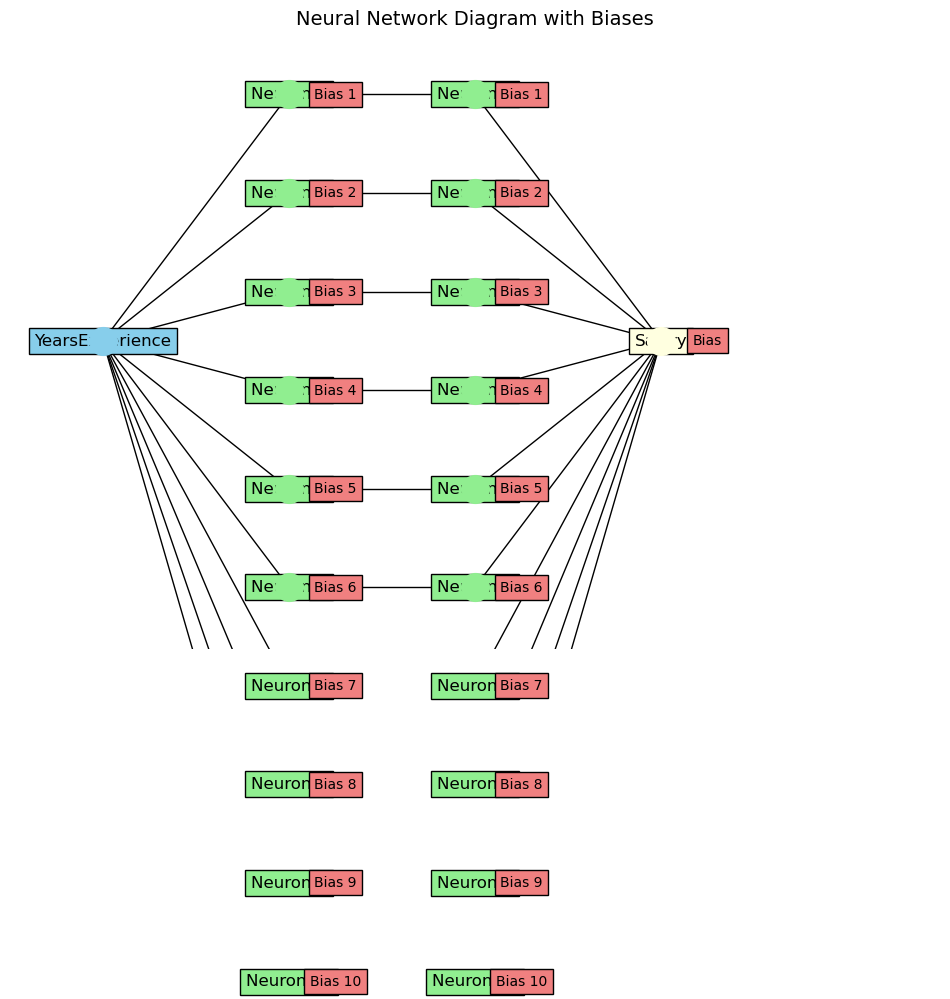

In [11]:
import matplotlib.pyplot as plt

def draw_neural_network():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw input layer
    ax.text(0.1, 0.5, 'YearsExperience', ha='center', va='center', fontsize=12, bbox=dict(facecolor='skyblue', edgecolor='black'))
    ax.plot(0.1, 0.5, 'o', color='skyblue', markersize=20, zorder=5)

    # Draw hidden layer 1
    for i in range(10):
        ax.text(0.3, 0.9 - i * 0.16, f'Neuron {i+1}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgreen', edgecolor='black'))
        ax.plot(0.3, 0.9 - i * 0.16, 'o', color='lightgreen', markersize=20, zorder=5)
        ax.text(0.35, 0.9 - i * 0.16, f'Bias {i+1}', ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightcoral', edgecolor='black'))

    # Draw hidden layer 2
    for i in range(10):
        ax.text(0.5, 0.9 - i * 0.16, f'Neuron {i+1}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgreen', edgecolor='black'))
        ax.plot(0.5, 0.9 - i * 0.16, 'o', color='lightgreen', markersize=20, zorder=5)
        ax.text(0.55, 0.9 - i * 0.16, f'Bias {i+1}', ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightcoral', edgecolor='black'))

    # Draw output layer
    ax.text(0.7, 0.5, 'Salary', ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightyellow', edgecolor='black'))
    ax.plot(0.7, 0.5, 'o', color='lightyellow', markersize=20, zorder=5)
    ax.text(0.75, 0.5, 'Bias', ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightcoral', edgecolor='black'))

    # Draw connections
    for i in range(10):
        ax.plot([0.1, 0.3], [0.5, 0.9 - i * 0.16], 'k-', lw=1)
        ax.plot([0.3, 0.5], [0.9 - i * 0.16, 0.9 - i * 0.16], 'k-', lw=1)
        ax.plot([0.5, 0.7], [0.9 - i * 0.16, 0.5], 'k-', lw=1)

    # Set limits and hide axes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    plt.title('Neural Network Diagram with Biases', fontsize=14)
    plt.savefig('neural_network_diagram.png', bbox_inches='tight')
    plt.show()

draw_neural_network()


In [17]:
def relu(x):
    return max(0, x)


In [19]:
relu(2)

2